## Zbiór danych
- musi się pobrać Zalando Fashion-MNIST
https://github.com/zalandoresearch/fashion-mnist

In [ ]:
# wczytanie potrzebnych bibliotek
import tensorflow as tf

# wczytanie danych
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()

print(f'Zbiór uczący: {X_train.shape}, zbiór walidacyjny: {X_val.shape}')

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Zbiór uczący: (60000, 28, 28), zbiór walidacyjny: (10000, 28, 28)


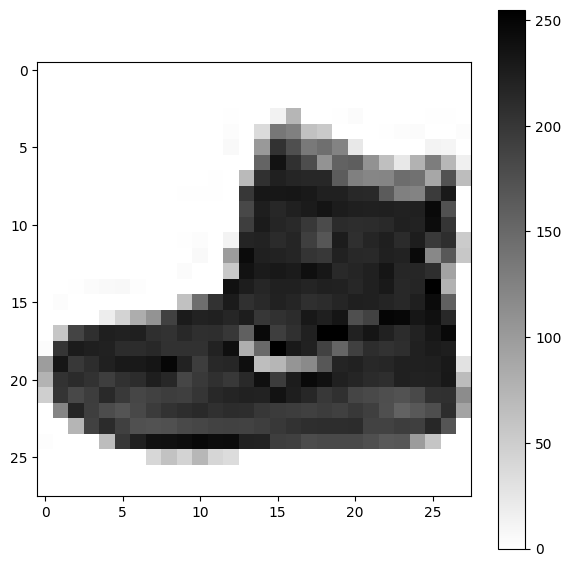

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [ ]:
def plot_digit(digit, dem=28, font_size=8):
    max_ax = font_size * dem

    fig = plt.figure(figsize=(10,10))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')

    for idx in range(dem):
        for jdx in range(dem):
            t = plt.text(idx*font_size, max_ax - jdx*font_size,
                         digit[jdx][idx], fontsize=font_size,
                         color="#000000")
            c = digit[jdx][idx] / 255.
            t.set_bbox(dict(facecolor=(c, c, c), alpha=0.5,
                            edgecolor='#f1f1f1'))

    plt.show()

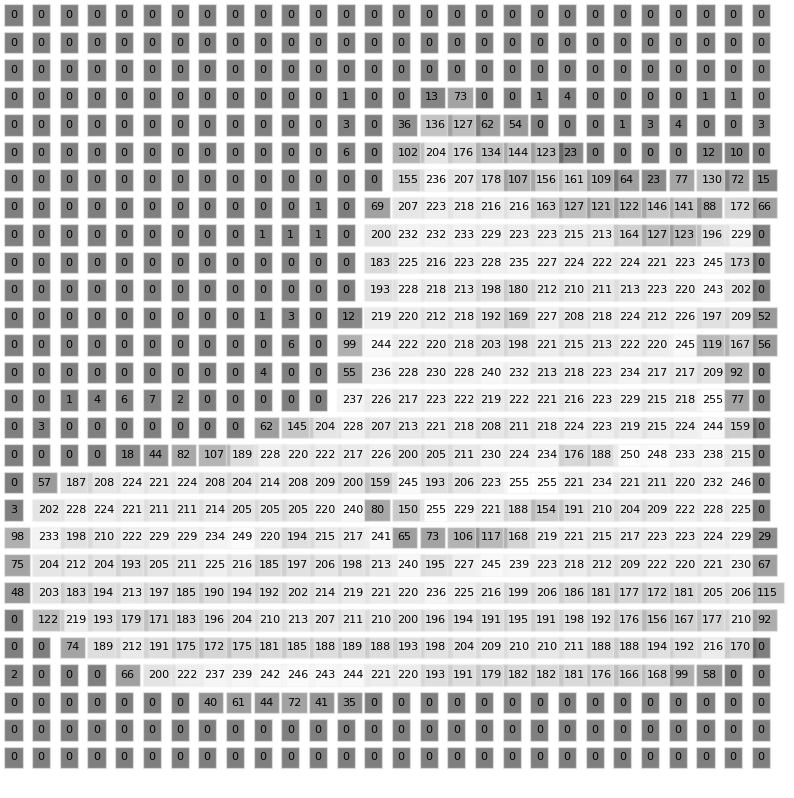

In [ ]:
plot_digit(X_train[0])

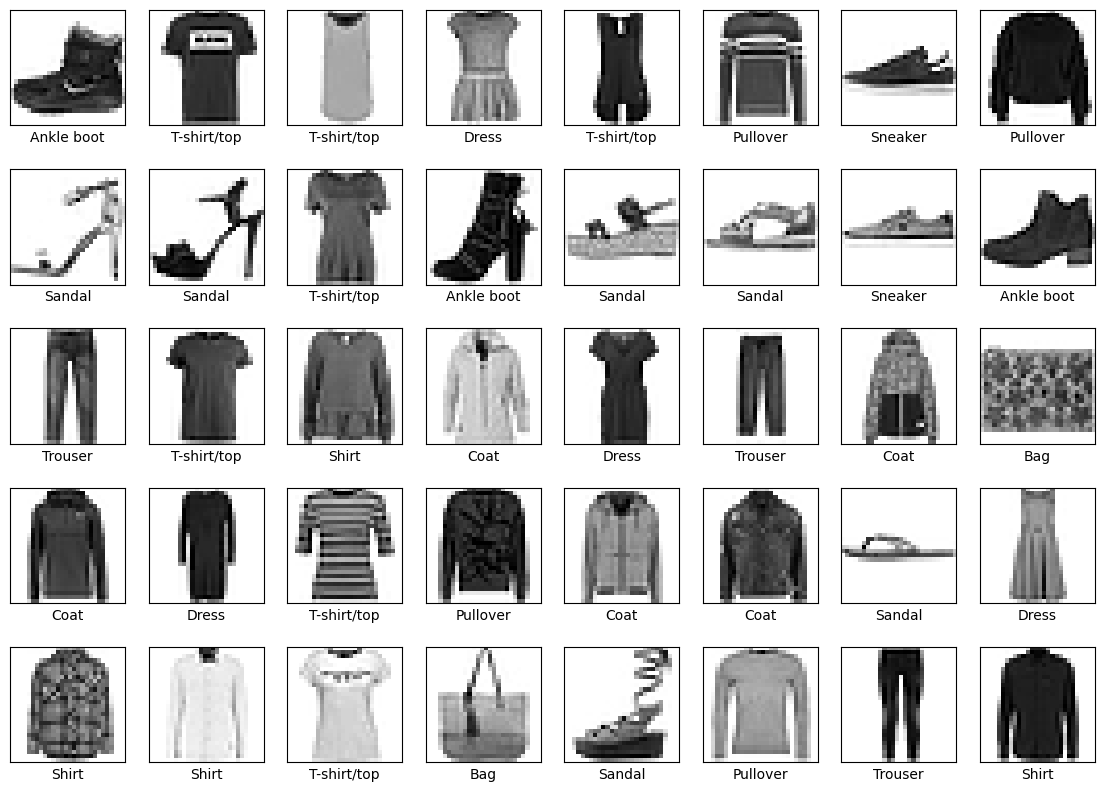

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(14,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Przygotowanie danych

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, len(class_names))
y_val = to_categorical(y_val, len(class_names))

## Pierwsza architektura

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [ ]:
from tensorflow.keras.layers import Flatten, add

model.add(Flatten(input_shape=(28, 28)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Definiowanie pierwszej warstwy ukrytej

In [ ]:
from tensorflow.keras.layers import Dense

model.add(Dense(128, activation='relu'))

Definiowanie warstwy wyjściowej

In [ ]:
model.add(Dense(10, activation = 'softmax'))

Kompilacja modelu

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Podsumowanie modelu

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Trenowanie modelu

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    verbose=1,
                    batch_size = 256,
                    validation_data = (X_val, y_val)
                   )

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7243 - loss: 0.8321 - val_accuracy: 0.8278 - val_loss: 0.4832
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8503 - loss: 0.4331 - val_accuracy: 0.8472 - val_loss: 0.4356
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8604 - loss: 0.3879 - val_accuracy: 0.8572 - val_loss: 0.4065
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8732 - loss: 0.3596 - val_accuracy: 0.8595 - val_loss: 0.3957
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8796 - loss: 0.3385 - val_accuracy: 0.8667 - val_loss: 0.3785
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8855 - loss: 0.3214 - val_accuracy: 0.8719 - val_loss: 0.3615
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8870 - loss: 0.3145 - val_accuracy: 0.8716 - val_loss: 0.3570
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8931 - loss: 0.3011 - val_accurac

Wizualizacja z trenowania

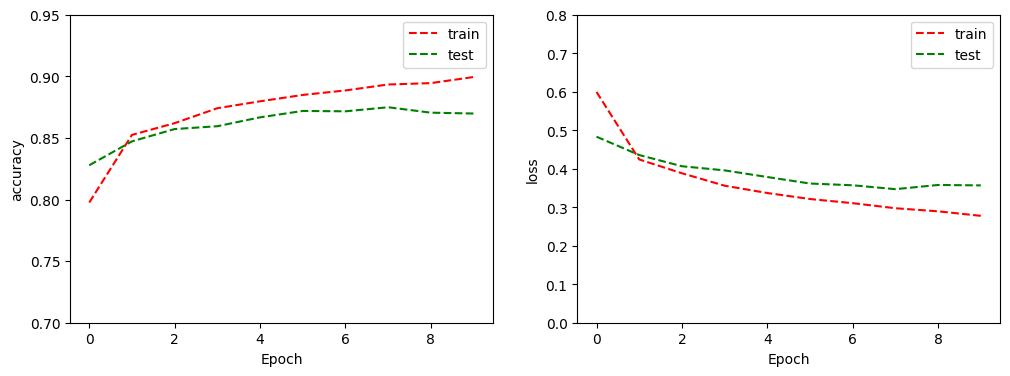

In [ ]:
def draw_curves(history, key1='accuracy', ylim1=(0.8, 1.00),
                key2='loss', ylim2=(0.0, 1.0)):
    plt.figure(figsize=(12,4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history[key1], "r--")
    plt.plot(history.history['val_' + key1], "g--")
    plt.ylabel(key1)
    plt.xlabel('Epoch')
    plt.ylim(ylim1)
    plt.legend(['train', 'test'], loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(history.history[key2], "r--")
    plt.plot(history.history['val_' + key2], "g--")
    plt.ylabel(key2)
    plt.xlabel('Epoch')
    plt.ylim(ylim2)
    plt.legend(['train', 'test'], loc='best')

    plt.show()

draw_curves(history, key1='accuracy', ylim1=(0.7, 0.95),
            key2='loss', ylim2=(0.0, 0.8))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7121 - loss: 0.8615 - val_accuracy: 0.8363 - val_loss: 0.4737
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8476 - loss: 0.4377 - val_accuracy: 0.8475 - val_loss: 0.4326
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8593 - loss: 0.3963 - val_accuracy: 0.8553 - val_loss: 0.4176
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8703 - loss: 0.3682 - val_accuracy: 0.8610 - val_loss: 0.3965
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8803 - loss: 0.3382 - val_accuracy: 0.8664 - val_loss: 0.3850
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8830 - loss: 0.3275 - val_accuracy: 0.8628 - val_loss: 0.3864
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8896 - loss: 0.3110 - val_accuracy: 0.8709 - val_loss: 0.3558
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8938 - loss: 0.2980 - val_accuracy: 

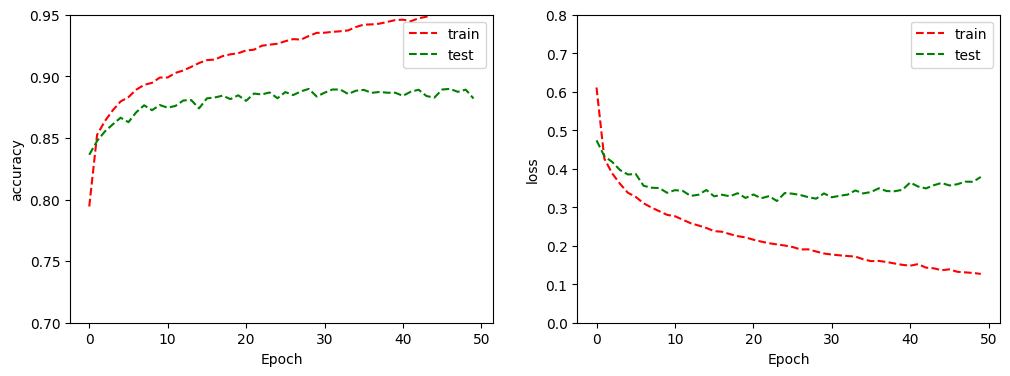

In [ ]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(128, activation='relu')) #FIX model -> model2
model2.add(Dense(10, activation = 'softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
model2.summary()

history2 = model2.fit(X_train,
                    y_train,
                    epochs=50,
                    verbose=1,
                    batch_size = 256,
                    validation_data = (X_val, y_val)
                   )

draw_curves(history2, key1='accuracy', ylim1=(0.7, 0.95),
            key2='loss', ylim2=(0.0, 0.8))

Predykcja

In [ ]:
y_train_pred = model.predict(X_train) #TRY model -> model2
y_val_pred = model.predict(X_val) #TRY model -> model2

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


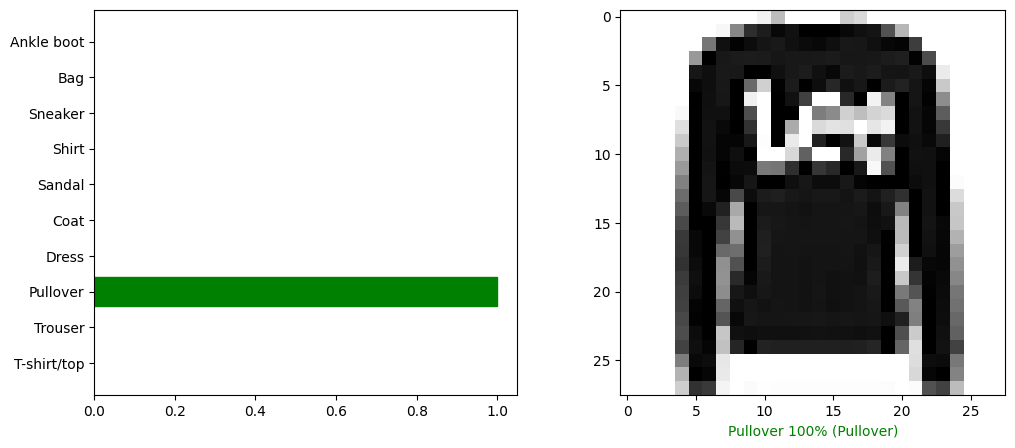

In [ ]:
import numpy as np #FIX added

def plot_value_img(i, predictions, true_label, img):
    predictions, true_label, img = predictions[i], true_label[i], img[i]
    predicted_label = np.argmax(predictions)
    true_value = np.argmax(true_label)

    plt.figure(figsize=(12,5))

    plt.subplot(1, 2, 1)

    plt.yticks(np.arange(len(class_names)), class_names)
    thisplot = plt.barh(range(10), predictions, color="gray")
    thisplot[predicted_label].set_color('r')
    thisplot[true_value].set_color('g')

    plt.subplot(1, 2, 2)

    plt.imshow(img, cmap=plt.cm.binary)
    if predicted_label == true_value:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions),
                                class_names[true_value]),
                                color=color)
    plt.show()

plot_value_img(1, y_val_pred,  y_val, X_val) #FIX pierwszy parametr to indeks analizowanego obrazu 1 4 12